In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.pandas.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Columns Meaning

1. age - Age of the person
2. sex - gender
3. cp - chest pain type
   Value 1: typical angina
   Value 2: atypical angina
   Value 3: non-anginal pain
   Value 4: asymptomatic
4. trtbps - resting blood pressure (in mm Hg)
5. chol - cholestoral in mg/dl fetched via BMI senso
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg - resting electrocardiographic results
   Value 0: normal
   Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalachh - maximum heart rate achieved
9. exng - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - Previous peak
11. ca - number of major vessels (0-3)
12. target : 0= less chance of heart attack 1= more chance of heart attack

In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# MIssing Values

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
#there no missing value
#there is no categorical value

In [9]:
fea_discreate = []
for feature in df.columns:
    if (len(df[feature].unique())<25) and (df[feature].dtypes != 'float64'):
        fea_discreate.append(feature)

In [10]:
fea_discreate=fea_discreate[:-1]

In [11]:
fea_discreate

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

In [12]:
df[fea_discreate].head()

,sex,cp,fbs,restecg,exng,slp,caa,thall
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2


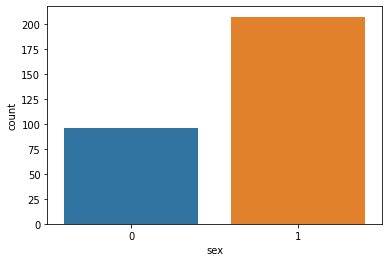

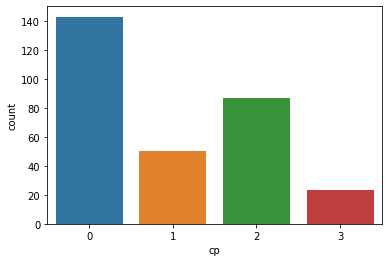

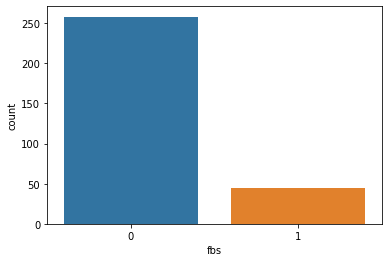

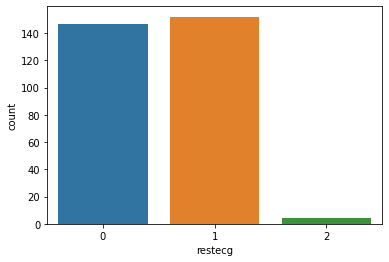

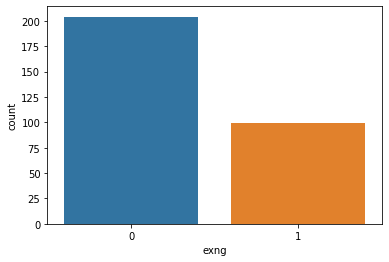

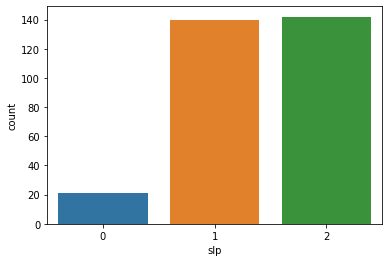

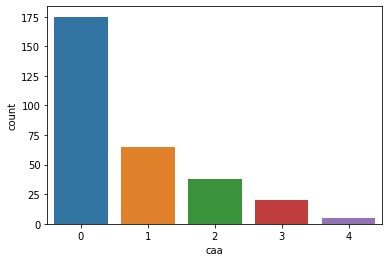

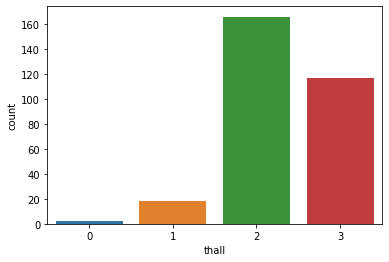

In [15]:
for feature in fea_discreate:
    sns.countplot(x = feature,data=df)
    #plt.ylabel(feature)
    plt.show()

In [16]:
for feature in fea_discreate:
    print(df[feature].value_counts())

1    207
0     96
Name: sex, dtype: int64
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
0    258
1     45
Name: fbs, dtype: int64
1    152
0    147
2      4
Name: restecg, dtype: int64
0    204
1     99
Name: exng, dtype: int64
2    142
1    140
0     21
Name: slp, dtype: int64
0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64
2    166
3    117
1     18
0      2
Name: thall, dtype: int64


In [17]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

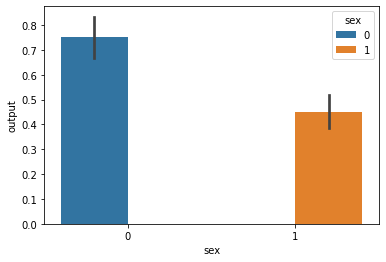

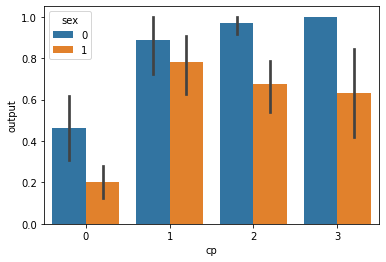

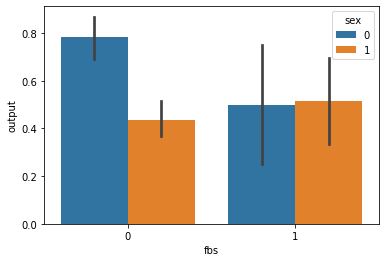

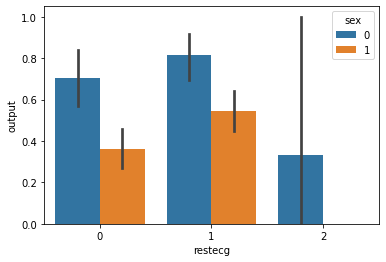

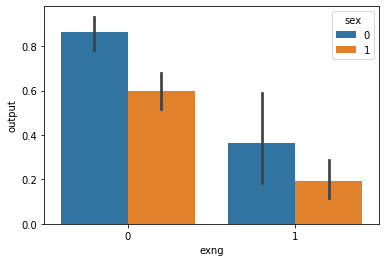

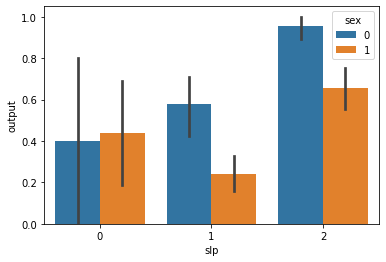

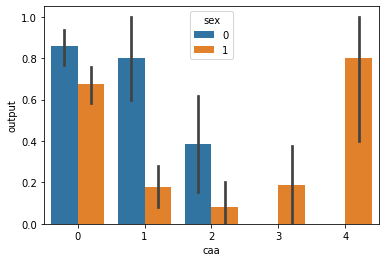

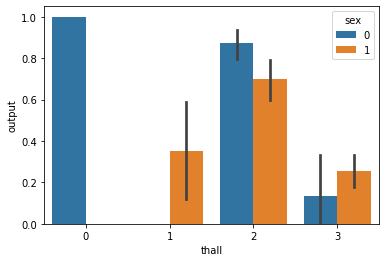

In [18]:
for feature in fea_discreate:
    sns.barplot(x =feature,y ='output',data=df,hue = 'sex')
    plt.show()

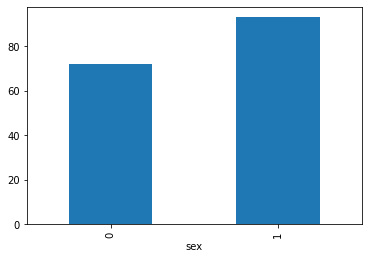

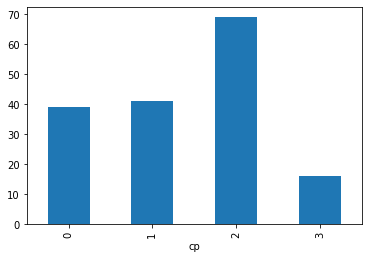

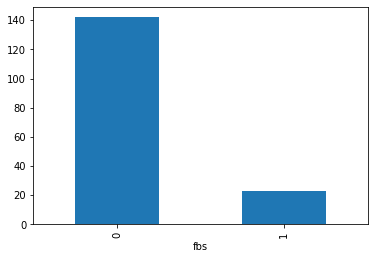

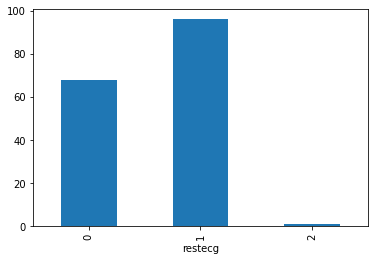

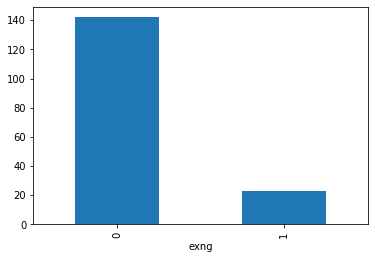

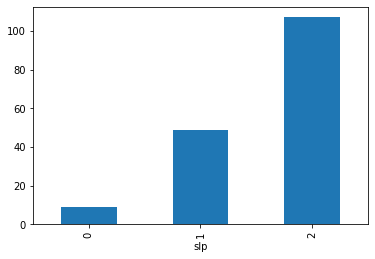

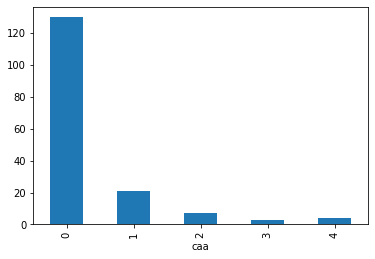

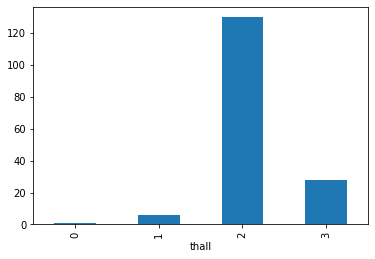

In [19]:
for feature in fea_discreate:
    df.groupby(feature)['output'].sum().plot.bar()
    plt.show()

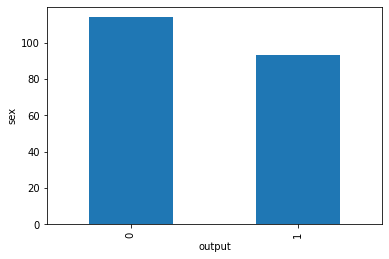

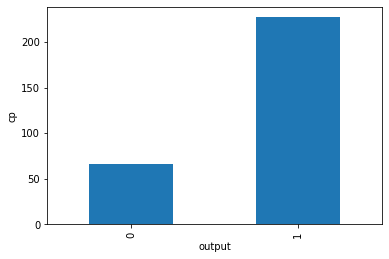

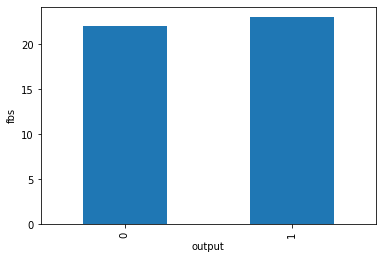

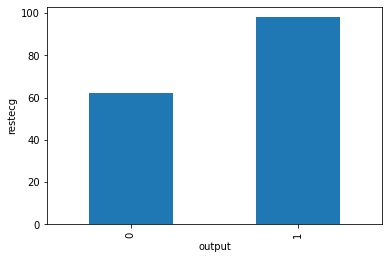

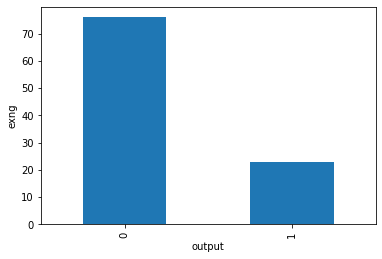

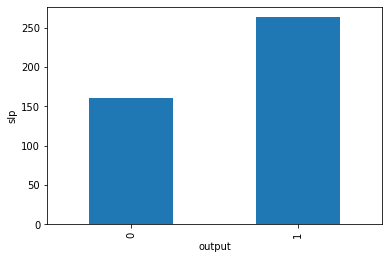

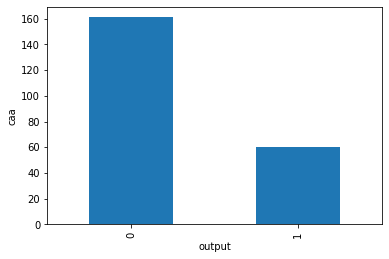

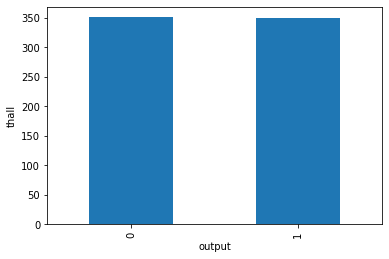

In [20]:
for feature in fea_discreate:
    df.groupby('output')[feature].sum().plot.bar()
    plt.ylabel(feature)
    plt.show()

In [21]:
fea_discreate.append('output')

In [22]:
df[fea_discreate].corr()

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
sex,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.210041,-0.280937
cp,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.161736,0.433798
fbs,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.011981,0.137230
exng,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.206754,-0.436757
slp,-0.030711,0.119717,-0.059894,0.093045,-0.257748,1.000000,-0.080155,-0.104764,0.345877
caa,0.118261,-0.181053,0.137979,-0.072042,0.115739,-0.080155,1.000000,0.151832,-0.391724
thall,0.210041,-0.161736,-0.032019,-0.011981,0.206754,-0.104764,0.151832,1.000000,-0.344029
output,-0.280937,0.433798,-0.028046,0.137230,-0.436757,0.345877,-0.391724,-0.344029,1.000000


In [23]:
fea_contious = []
for feature in df.columns:
    if feature not in fea_discreate:
        fea_contious.append(feature)

In [24]:
fea_contious

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

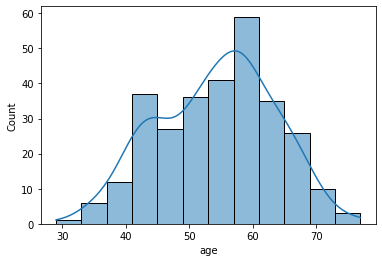

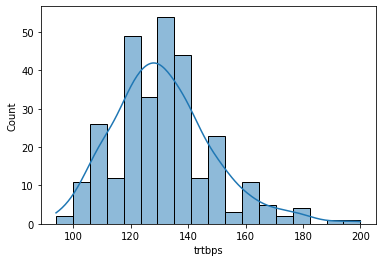

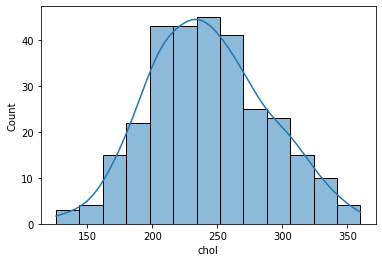

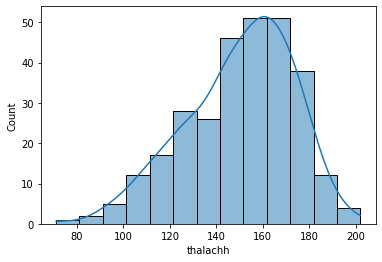

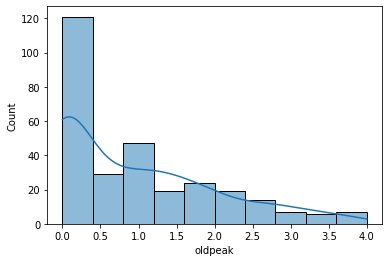

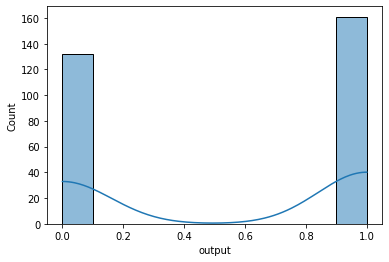

In [67]:
for feature in fea_contious:
    sns.histplot(x= feature,data = df2,kde=True)
    plt.show()

<AxesSubplot:xlabel='age', ylabel='chol'>

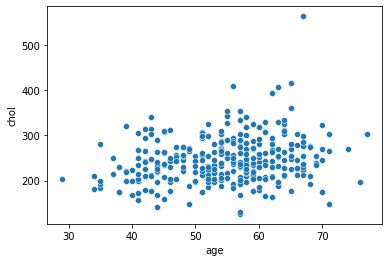

In [27]:
sns.scatterplot(x = 'age',y='chol',data=df)

In [30]:
df[fea_contious].corr()

,age,trtbps,chol,thalachh,oldpeak,output
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
output,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


In [29]:
fea_contious.append('output')

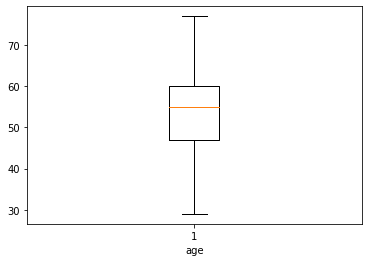

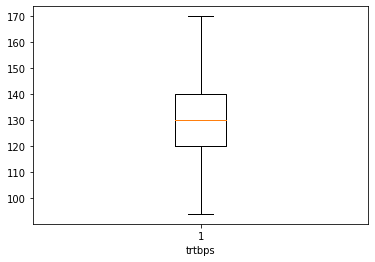

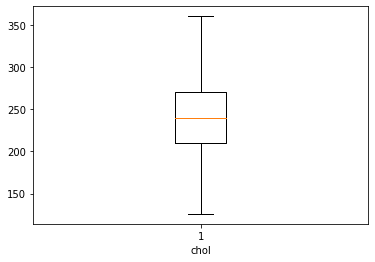

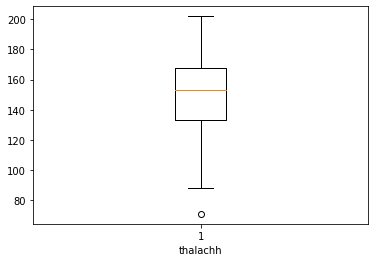

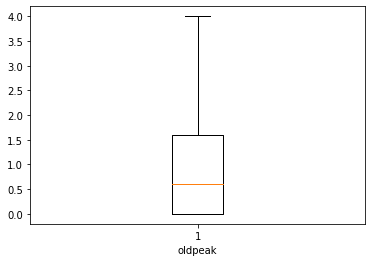

In [52]:
for feature in fea_contious:
    if feature != 'output':
        plt.boxplot(x = df3[feature])
        plt.xlabel(feature)
        plt.show()

In [33]:
# we have outlier in oldpeak , chol,thalachh,trtbps

In [34]:
q1 = np.percentile(df['oldpeak'],25)
q2 =np.percentile(df['oldpeak'],75)

In [36]:
iqr = q2-q1
lower_fence = q1-(1.5*(iqr))
upper_fence = q2+(1.5*(iqr))

In [37]:
lower_fence,upper_fence

(-2.4000000000000004, 4.0)

In [41]:
df1 = df[(df['oldpeak']>=lower_fence)&(df['oldpeak']<=upper_fence)]

In [42]:
df1['oldpeak'].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 1.1, 2. , 0.7, 0.3, 0.9, 3.6,
       3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 4. , 2.9, 2.1, 3.8])

In [44]:
q1 = np.percentile(df['chol'],25)
q2 =np.percentile(df['chol'],75)

In [45]:
iqr = q2-q1
lower_fence = q1-(1.5*(iqr))
upper_fence = q2+(1.5*(iqr))

In [46]:
df2 = df1[(df1['chol']>=lower_fence)&(df1['chol']<=upper_fence)]

In [49]:
q1 = np.percentile(df['trtbps'],25)
q2 =np.percentile(df['trtbps'],75)

In [50]:
iqr = q2-q1
lower_fence = q1-(1.5*(iqr))
upper_fence = q2+(1.5*(iqr))

In [51]:
df3= df2[(df2['trtbps']>=lower_fence)&(df2['trtbps']<=upper_fence)]

In [62]:
old = []
for i in df3['oldpeak']:
    if i!=0.0:
        old.append(i)
    elif i ==0.0:
        old.append(i)

In [79]:
old_peak = []
for i in old:
    if i != 0.0:
        fitted_data = np.log10(i)
        old_peak.append(fitted_data)
    elif i ==0.0 :
        old_peak.append(i)

<AxesSubplot:ylabel='Count'>

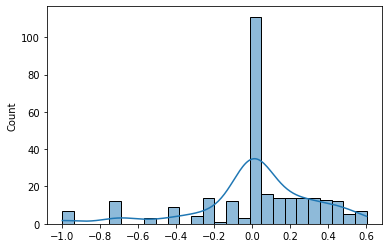

In [80]:
sns.histplot(old_peak,kde=True)

In [81]:
df3['oldpeak']=old_peak

C:\Users\VIJITK~1\AppData\Local\Temp/ipykernel_28972/3064365711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['oldpeak']=old_peak


In [85]:
from sklearn.preprocessing import StandardScaler
x = df3.drop('output',axis=1)
y = df3['output']

In [86]:
scale = StandardScaler()
d = scale.fit_transform(x)

In [88]:
d

array([[ 0.97812531,  0.65192024,  1.95670953, ..., -2.38973909,
        -0.70496379, -2.13063557],
       [-1.85974021,  0.65192024,  0.98517257, ..., -2.38973909,
        -0.70496379, -0.48502273],
       [-1.42314552, -1.53392998,  0.01363561, ...,  0.95706996,
        -0.70496379, -0.48502273],
       ...,
       [ 1.52386868,  0.65192024, -0.95790136, ..., -0.71633457,
         1.29418726,  1.16059011],
       [ 0.32323327,  0.65192024, -0.95790136, ..., -0.71633457,
         0.29461173,  1.16059011],
       [ 0.32323327, -1.53392998,  0.01363561, ..., -0.71633457,
         0.29461173, -0.48502273]])

In [89]:
x.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,0.361728,0,0,1
1,37,1,2,130,250,0,1,187,0,0.544068,0,0,2


In [90]:
x = pd.DataFrame(d,columns=['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall'])

In [91]:
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.978125,0.65192,1.956710,0.986785,-0.203142,2.474874,-1.025619,0.010181,-0.679366,1.104822,-2.389739,-0.704964,-2.130636
1,-1.859740,0.65192,0.985173,0.008013,0.178045,-0.404061,0.923057,1.612543,-0.679366,1.690388,-2.389739,-0.704964,-0.485023
2,-1.423146,-1.53393,0.013636,0.008013,-0.853402,-0.404061,-1.025619,0.962937,-0.679366,0.412445,0.957070,-0.704964,-0.485023
3,0.214085,0.65192,0.013636,-0.644501,-0.135874,-0.404061,0.923057,1.222779,-0.679366,-0.368046,0.957070,-0.704964,-0.485023
4,0.323233,-1.53393,-0.957901,-0.644501,2.510012,-0.404061,0.923057,0.573173,1.471960,-0.769274,0.957070,-0.704964,-0.485023


<AxesSubplot:xlabel='age', ylabel='Count'>

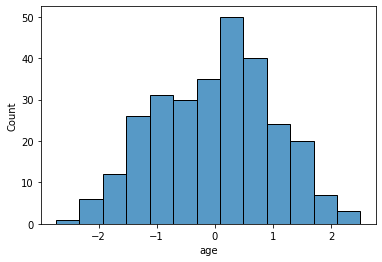

In [92]:
sns.histplot(x['age'])

In [93]:
x.corrwith(y)

age        -0.205968
sex        -0.291729
cp          0.369302
trtbps     -0.099822
chol       -0.087562
fbs        -0.011863
restecg     0.129405
thalachh    0.394055
exng       -0.398745
oldpeak    -0.274212
slp         0.278901
caa        -0.334095
thall      -0.323707
dtype: float64

In [94]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [177]:
fea_sel = SelectFromModel(Lasso(alpha=0.05))

In [178]:
s1 = fea_sel.fit(x,y)

In [179]:
x.columns[(s1.get_support())]

Index(['sex', 'cp', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall'], dtype='object')

In [120]:
x.head()

,age,sex,cp,trtbps,chol,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.978125,0.65192,1.956710,0.986785,-0.203142,-1.025619,0.010181,-0.679366,1.104822,-2.389739,-0.704964,-2.130636
1,-1.859740,0.65192,0.985173,0.008013,0.178045,0.923057,1.612543,-0.679366,1.690388,-2.389739,-0.704964,-0.485023
2,-1.423146,-1.53393,0.013636,0.008013,-0.853402,-1.025619,0.962937,-0.679366,0.412445,0.957070,-0.704964,-0.485023
3,0.214085,0.65192,0.013636,-0.644501,-0.135874,0.923057,1.222779,-0.679366,-0.368046,0.957070,-0.704964,-0.485023
4,0.323233,-1.53393,-0.957901,-0.644501,2.510012,0.923057,0.573173,1.471960,-0.769274,0.957070,-0.704964,-0.485023


In [183]:
x.drop('restecg',axis=1,inplace=True)

In [184]:
from sklearn.neighbors import KNeighborsClassifier

In [185]:
knn = KNeighborsClassifier()

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [188]:
knn = KNeighborsClassifier(n_neighbors=1)

In [189]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [190]:
pred = knn.predict(x_test)

In [191]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [192]:
print(confusion_matrix(y_test,pred))

[[35  7]
 [10 34]]


In [193]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        42
           1       0.83      0.77      0.80        44

    accuracy                           0.80        86
   macro avg       0.80      0.80      0.80        86
weighted avg       0.80      0.80      0.80        86



In [194]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10)
    accuracy_rate.append(score.mean())

In [195]:
error_rate=[]
# Will take some time
for i in range(1,70):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

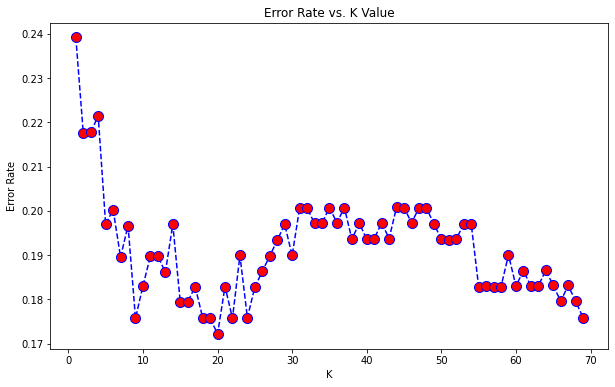

In [196]:
plt.figure(figsize=(10,6))
plt.plot(range(1,70),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         #markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [220]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

In [221]:
print(confusion_matrix(y_test,pred))

[[31 11]
 [ 4 40]]


In [222]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81        42
           1       0.78      0.91      0.84        44

    accuracy                           0.83        86
   macro avg       0.84      0.82      0.82        86
weighted avg       0.83      0.83      0.82        86



# Naive Bayes

In [223]:
from sklearn.naive_bayes import GaussianNB

In [224]:
naive = GaussianNB()
naive.fit(x_train,y_train)

GaussianNB()

In [225]:
pred = naive.predict(x_test)

In [226]:
print(confusion_matrix(y_test,pred))

[[31 11]
 [ 5 39]]


In [227]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79        42
           1       0.78      0.89      0.83        44

    accuracy                           0.81        86
   macro avg       0.82      0.81      0.81        86
weighted avg       0.82      0.81      0.81        86



# logestic

In [230]:
from sklearn.linear_model import LogisticRegression

In [231]:
reg = LogisticRegression()

In [232]:
reg.fit(x_train,y_train)

LogisticRegression()

In [233]:
pred = reg.predict(x_test)

In [234]:
print(confusion_matrix(y_test,pred))

[[32 10]
 [ 3 41]]


In [235]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83        42
           1       0.80      0.93      0.86        44

    accuracy                           0.85        86
   macro avg       0.86      0.85      0.85        86
weighted avg       0.86      0.85      0.85        86



In [236]:
from sklearn.model_selection import GridSearchCV

In [237]:
params = {'C':[1e+15,1e+10,1e+2,1,2,5,10,12,25,40,60],'penalty':['l1', 'l2', 'elasticnet', 'none'],'solver':['lbfgs','liblinear','sag','saga']}

In [238]:
reg_log = GridSearchCV(reg,params,scoring='accuracy',cv = 10)

In [239]:
reg_log.fit(x_train,y_train)

C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\vijit kumar\.conda\envs\notebook\lib\site-packages\sklearn\linear_model\_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\vijit kumar\.con

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1000000000000000.0, 10000000000.0, 100.0, 1, 2,
                               5, 10, 12, 25, 40, 60],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [240]:
print(reg_log.best_params_)

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}


In [241]:
pred=reg_log.predict(x_test)

In [242]:
print(confusion_matrix(y_test,pred))

[[32 10]
 [ 4 40]]


In [243]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        42
           1       0.80      0.91      0.85        44

    accuracy                           0.84        86
   macro avg       0.84      0.84      0.84        86
weighted avg       0.84      0.84      0.84        86



# Decision tree

In [244]:
 from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini')

In [245]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.5377604166666666, 0.9545454545454546, 'X[7] <= 0.338\ngini = 0.488\nsamples = 199\nvalue = [84, 115]'),
 Text(0.2682291666666667, 0.8636363636363636, 'X[6] <= -0.205\ngini = 0.369\nsamples = 127\nvalue = [31, 96]'),
 Text(0.13541666666666666, 0.7727272727272727, 'X[4] <= 0.681\ngini = 0.185\nsamples = 87\nvalue = [9, 78]'),
 Text(0.0625, 0.6818181818181818, 'X[2] <= -2.87\ngini = 0.121\nsamples = 77\nvalue = [5, 72]'),
 Text(0.041666666666666664, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.08333333333333333, 0.5909090909090909, 'X[7] <= -2.953\ngini = 0.1\nsamples = 76\nvalue = [4, 72]'),
 Text(0.041666666666666664, 0.5, 'X[2] <= -0.618\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.020833333333333332, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0625, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.125, 0.5, 'X[2] <= 0.378\ngini = 0.078\nsamples = 74\nvalue = [3, 71]'),
 Text(0.1041666666666666

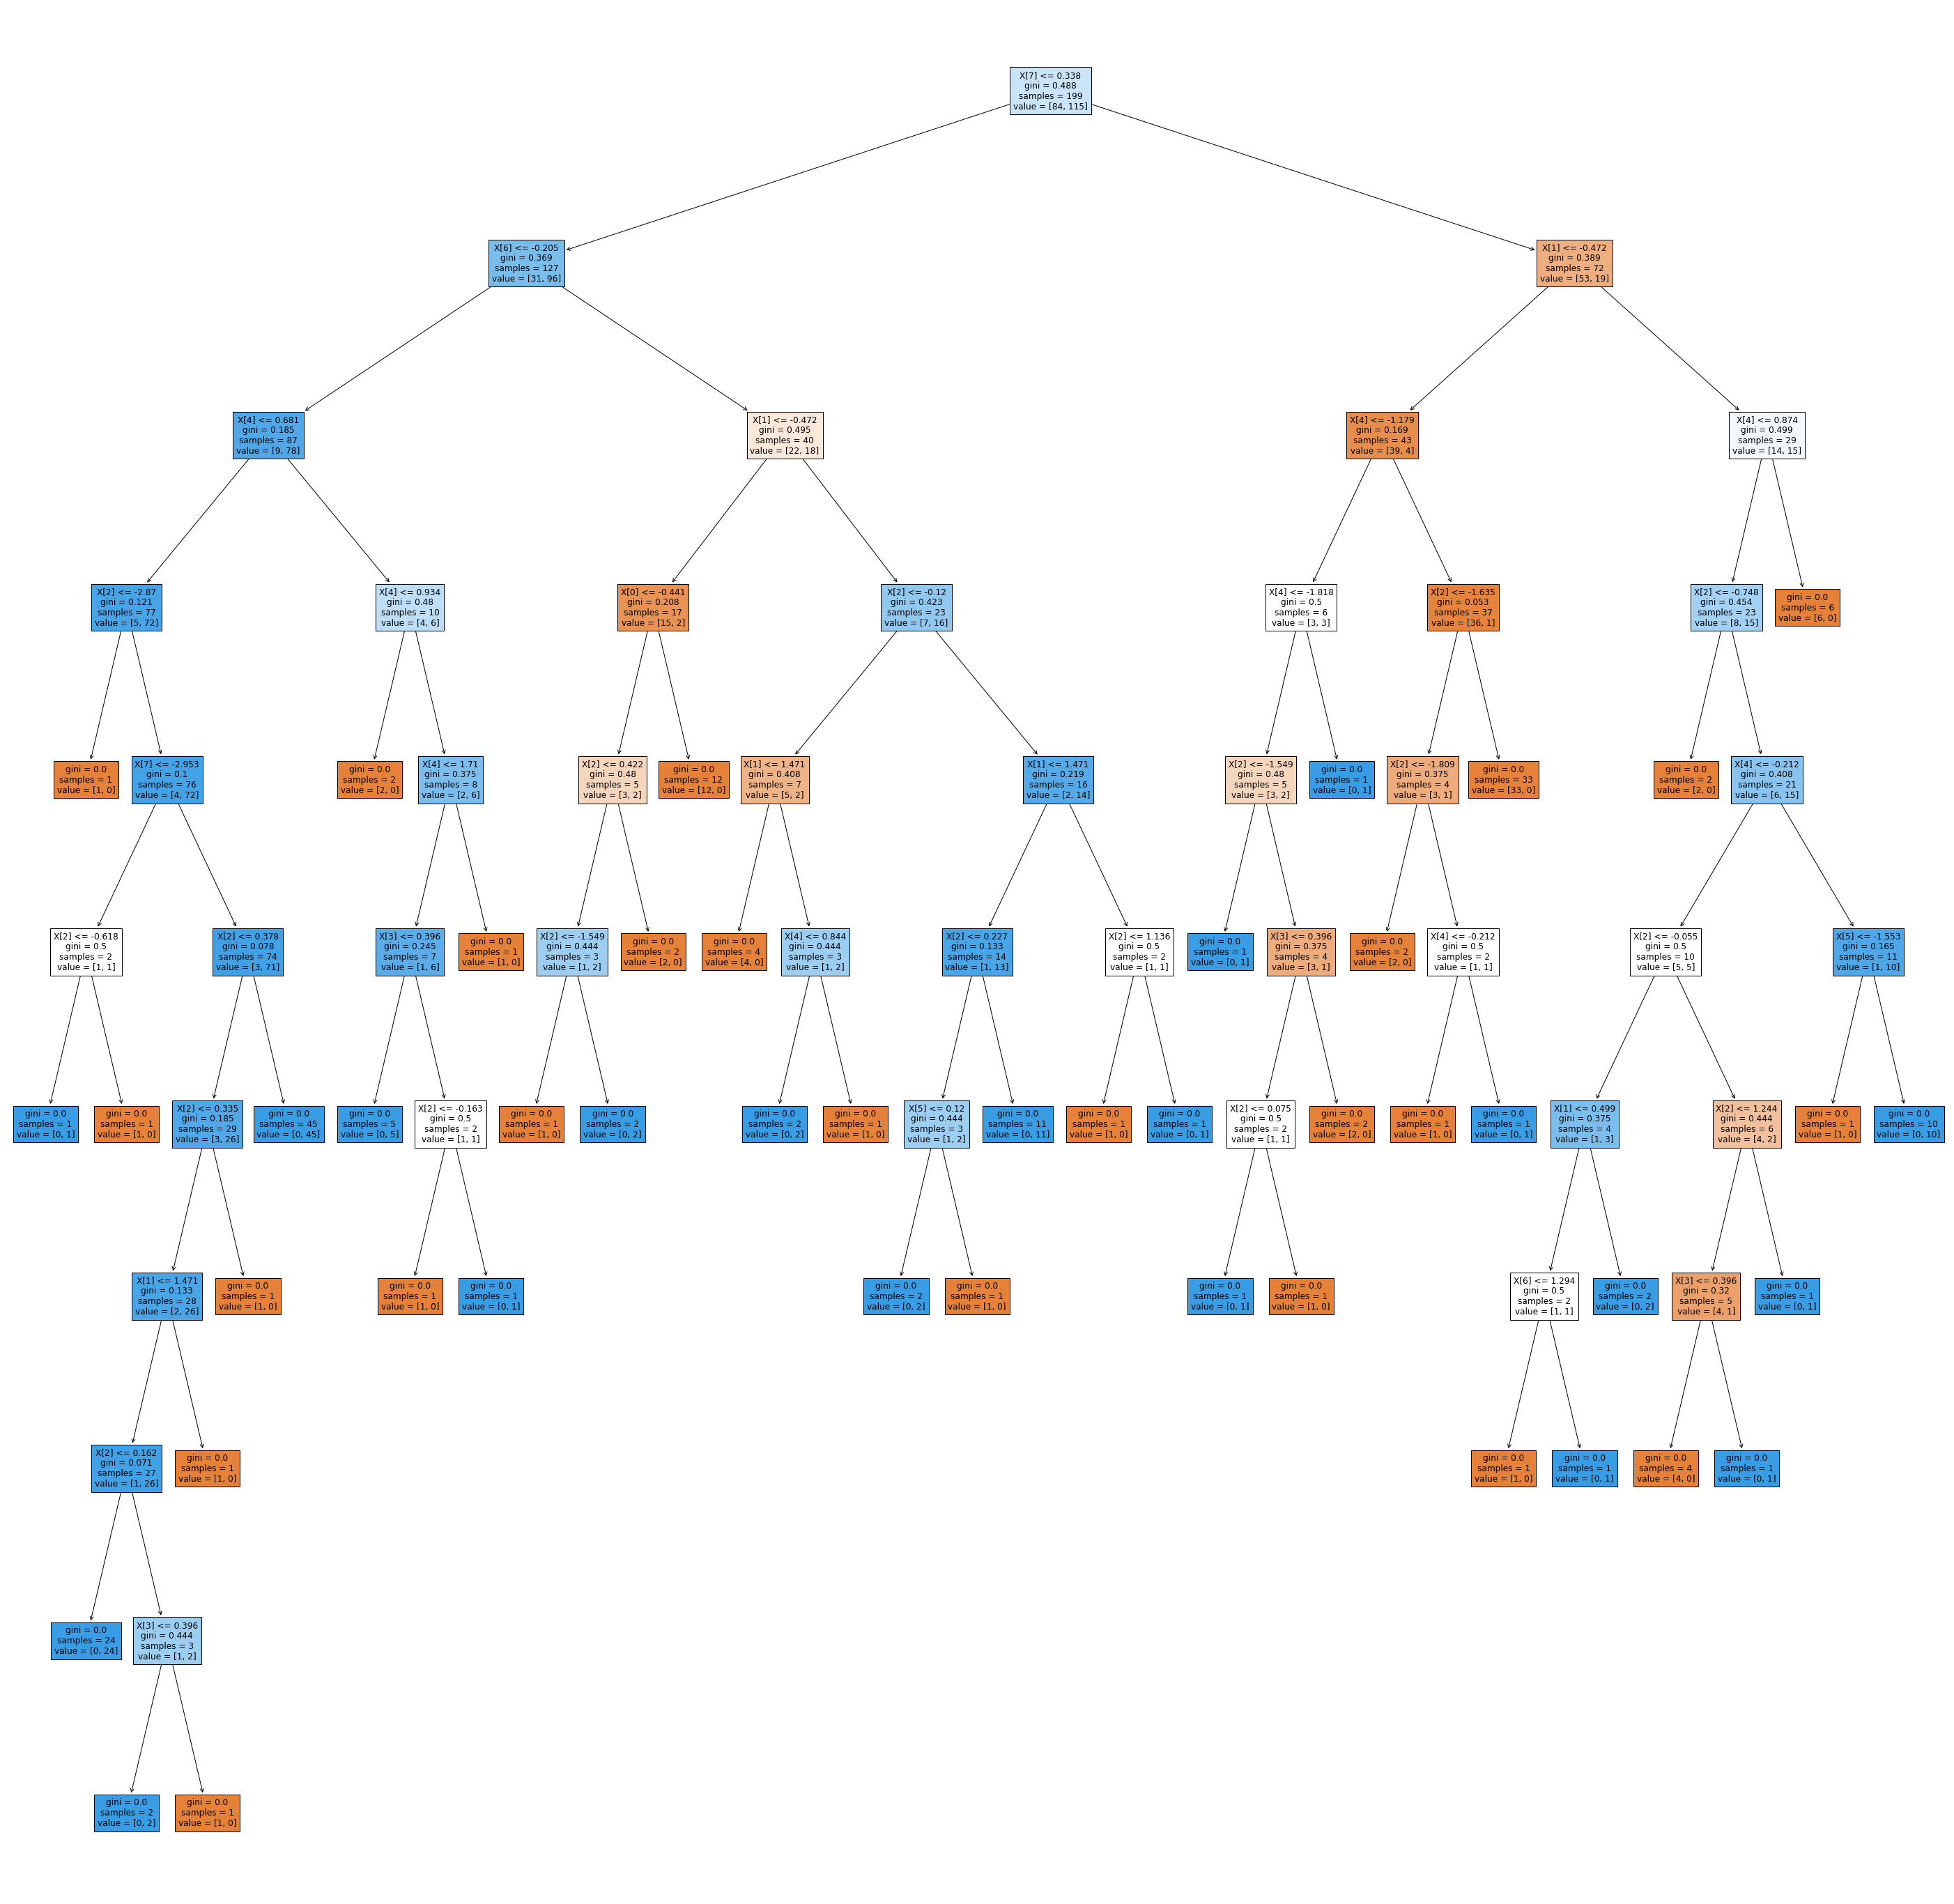

In [249]:
from sklearn import tree
plt.figure(figsize=(50,50))
tree.plot_tree(classifier,filled=True)

In [250]:
params = {'criterion':['gini','entropy'],'max_depth':[5,10,2,4,40,30],'min_samples_split':[2,5,4,6]}
des_regressor = GridSearchCV(classifier,params,cv = 5)

In [252]:
des_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 2, 4, 40, 30],
                         'min_samples_split': [2, 5, 4, 6]})

In [253]:
print(des_regressor.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


In [254]:
pred = des_regressor.predict(x_test)

In [255]:
print(confusion_matrix(y_test,pred))

[[34  8]
 [ 6 38]]


In [256]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        42
           1       0.83      0.86      0.84        44

    accuracy                           0.84        86
   macro avg       0.84      0.84      0.84        86
weighted avg       0.84      0.84      0.84        86

